<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentado por:** Diana Aribel Guzmán

# **1. Contexto del Análisis**

Netflix es una plataforma de Streaming que ofrece acceso online a una gran cantidad de programas de televisión, películas, documentales y más. Esta empresa fue fundada en 1997. Sus usuarios pueden ver su contenido favorito en cualquier momento, cualquier lugar, e incluso, en una variedad de dispositivos que incluye televisores inteligentes, computadores, telefonos inteligentes y tabletas.

# **2. Pregunta SMART:**

La pregunta general de valor para el negocio sería: ¿Cuál ha sido el comportamiento histórico de los programas de TV o películas lanzados por Netflix, a través del cual se pueda ayudar a la plataforma a decidir qué tipo de programas de TV ó películas hacer para crecer el negocio en diferentes países?.

Para responder ésta pregunta, necesitamos hacernos otras: ¿Cuáles son los géneros de programas de TV ó películas más populares? ¿Cuáles son los directores más populares? ¿Cuáles son los paises donde se producen más programas de TV o películas? ¿cómo ha sido el comportamiento de lanzamiento de programas de TV ó películas en la plataforma a través de los años? ¿Cuál es la duración promedio de los programas de TV ó películas?

# **3. Caracteristicas de la base de datos:**

Tomado de: https://www.kaggle.com/datasets/shivamb/netflix-shows

La siguiente es una base de datos consta de un listado de todas las películas y programas de televisión disponibles en Netflix, junto con detalles como: elenco, directores, calificaciones, año de lanzamiento, duración, etc.

**Variables**:

* **Show_id**: ID único para cada película o programa de televisión. *Variable categórica nominal*.

* **Type**: Identificador de película o programa de televisión. *Variable categórica nominal*.

* **Title**: Título de película o programa de televisión (serie). *Variable categórica nominal*.

* **Director**: Director de película o programa de televisión. *Variable categórica nominal*.

* **Cast**: Actores involucrados en película o programa de televisión. *Variable categórica nominal*.

* **Country**: País donde fue producida la película o programa de televisión. *Variable categórica nominal*.

* **Date_added**: Fecha en la fue añadida en Netflix. *Variable numérica discreta*.

* **Release_year**: Año actual de lanzamiento de la película o programa de televisión. *Variable numérica discreta*.

* **Rating**: Rating (valoración) de la película o programa de televisión. *Variable categórica ordinal*.

* **Duration**: Duración total. Puede ser de dos tipos: de la película (en minutos). Variable númerica discreta. O del programa de televisión (número de temporadas). *Variable categórica ordinal*.

* **Listed_in**: Género de la película o programa de televisión. *Variable categórica nominal*.

* **Description**: Resúmen descriptivo de la película o programa de televisión. *Variable categórica nominal*.




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from locale import normalize

In [ ]:
from google.colab import drive #librería para usar datos desde Drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/0.MaestriaDSIcesi/EDA/Tarea_1/netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **4. Análisis del Dataset**

# Análisis General:

In [ ]:
# Forma del dataframe (filas, columnas)
df.shape

(8807, 12)

In [ ]:
# Nombre de variables
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Tipo de datos
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#Análisis descriptivo de variables numéricas
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#Análisis descriptivo de variables categóricas para ver cuáles son valores cualitativos más recurrentes:
df.describe(include = 'object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [ ]:
#Revisando número de valores únicos por variable
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
#Verificando datos nulos
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Dimensionando a nivel porcentual a cuánto, del total de los datos, corresponden los datos nulos
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

# Tratamiento de datos nulos:

In [ ]:
# Dado que el peso porcentual de datos nulos es grande (mayor al 9%) para las categorías de director, elenco y país, se reemplazan por una categoria "desconocida".
df['director'].fillna('Unknown director',inplace=True)
df['cast'].fillna('Unknown cast',inplace=True)
df['country'].fillna('Unknown country',inplace=True)
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Dimensionando a nivel porcentual a cuánto, del total de los datos, corresponden los datos nulos nuevamente
df.isnull().sum()/len(df)*100

show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
date_added      0.113546
release_year    0.000000
rating          0.045418
duration        0.034064
listed_in       0.000000
description     0.000000
dtype: float64

In [ ]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
#Algunos valores de las columnas de rating y duration estaban trocados. Por tanto, organizamos correctamente esta información:
df.loc[df['duration'].isnull(),'duration'] = df.loc[df['duration'].isnull(),'duration'].fillna(df['rating'])
df.loc[df['rating'].str.contains('min', na=False),'rating'] = 'NR'
df['rating'].fillna('NR',inplace=True)

In [ ]:
#Dimensionando a nivel porcentual a cuánto, del total de los datos, corresponden los datos nulos nuevamente
df.isnull().sum()/len(df)*100

show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
date_added      0.113546
release_year    0.000000
rating          0.000000
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

In [ ]:
#finalmente, dado que los valores faltantes de la columna date_added corresponden a menos del 1% de los datos y no se pueden reemplazar facilmente, procedo a eliminarlos
df = df.dropna(subset = ['date_added'])

In [ ]:
#Dimensionando a nivel porcentual a cuánto, del total de los datos, corresponden los datos nulos nuevamente
df.isnull().sum()/len(df)*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

# Formatos de variables:

In [ ]:
#para no tener que estar reiniciando la base de datos, vamos guardando versiones de cambios
new_base=df.copy()

In [ ]:
#Cambiando el formato a datetime para la columna de fecha en la que se añade el programa de TV o película y separando en meses y años para análisis posterior
new_base["date_added"] = pd.to_datetime(new_base['date_added'])

new_base['month_name_added']=new_base['date_added'].dt.month_name()
new_base['year_added'] = new_base['date_added'].dt.year
new_base.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


In [ ]:
#Separando la duración por películas y programas de TV en diferentes columnas respectivamente:

new_base['movies_min'] = new_base['duration'].copy()
new_base['movies_min'] = new_base['movies_min'].str.replace(" min","")
new_base.loc[new_base['movies_min'].str.contains('Season'),'movies_min'] = '0'

new_base['TV_Program_seasons'] = new_base['duration'].copy()
new_base['TV_Program_seasons'] = new_base['TV_Program_seasons'].str.replace(" Seasons","")
new_base['TV_Program_seasons'] = new_base['TV_Program_seasons'].str.replace(" Season","")
new_base.loc[new_base['TV_Program_seasons'].str.contains('min'),'TV_Program_seasons'] = '0'

new_base.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_name_added,year_added,movies_min,TV_Program_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,90,0
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,0,1
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,0,1
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021,0,2


In [ ]:
#formateando el tipo de dato de la duración de películas a enteros
new_base['movies_min']=new_base['movies_min'].astype('int')

In [ ]:
##formateando el tipo de dato de la duración de programas de TV a enteros
new_base['TV_Program_seasons']=new_base['TV_Program_seasons'].astype('int')

In [ ]:
#Comprobando los tipos de datos de todas las variables
new_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             8797 non-null   object        
 1   type                8797 non-null   object        
 2   title               8797 non-null   object        
 3   director            8797 non-null   object        
 4   cast                8797 non-null   object        
 5   country             8797 non-null   object        
 6   date_added          8797 non-null   datetime64[ns]
 7   release_year        8797 non-null   int64         
 8   rating              8797 non-null   object        
 9   duration            8797 non-null   object        
 10  listed_in           8797 non-null   object        
 11  description         8797 non-null   object        
 12  month_name_added    8797 non-null   object        
 13  year_added          8797 non-null   int64       

# Preparación de columnas para análisis univariado:

In [ ]:
#Desagregamos los datos de las columnas de director, cast, country y listed_in:
#Comenzamos con director:

column_split=new_base['director'].apply(lambda x: str(x).split(', ')).tolist()
df_Director = pd.DataFrame(column_split, index = new_base['title'])
df_Director = df_Director.stack()
df_Director = pd.DataFrame(df_Director.reset_index())
df_Director.rename(columns={0:'director'},inplace=True)
df_Director = df_Director.drop(['level_1'],axis=1)
df_Director.head(5)

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown director
4,Kota Factory,Unknown director


In [ ]:
#Desagregando los datos de las columnas de director, cast, country y listed_in:
#seguimos con cast:

column_split=new_base['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_Cast = pd.DataFrame(column_split, index = new_base['title'])
df_Cast = df_Cast.stack()
df_Cast = pd.DataFrame(df_Cast.reset_index())
df_Cast.rename(columns={0:'cast'},inplace=True)
df_Cast = df_Cast.drop(['level_1'],axis=1)
df_Cast.head(5)

,title,cast
0,Dick Johnson Is Dead,Unknown cast
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
#Desagregando los datos de las columnas de director, cast, country y listed_in:
#seguimos con country:

column_split=new_base['country'].apply(lambda x: str(x).split(', ')).tolist()
df_Country = pd.DataFrame(column_split, index = new_base['title'])
df_Country = df_Country.stack()
df_Country = pd.DataFrame(df_Country.reset_index())
df_Country.rename(columns={0:'country'},inplace=True)
df_Country = df_Country.drop(['level_1'],axis=1)
df_Country.head(5)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unknown country
3,Jailbirds New Orleans,Unknown country
4,Kota Factory,India


In [ ]:
#Desagregando los datos de las columnas de director, cast, country y listed_in:
#seguimos con listed_in (Genre):

column_split=new_base['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_Genre = pd.DataFrame(column_split, index = new_base['title'])
df_Genre = df_Genre.stack()
df_Genre = pd.DataFrame(df_Genre.reset_index())
df_Genre.rename(columns={0:'genre'},inplace=True)
df_Genre = df_Genre.drop(['level_1'],axis=1)
df_Genre.head(5)

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
#Uniendo todo en un Dataframe:

df1 = df_Cast.merge(df_Director,on=['title'],how='inner')
df2 = df1.merge(df_Country,on=['title'],how='inner')
df3 = df2.merge(df_Genre,on=['title'],how='inner')

df3.head(5)

,title,cast,director,country,genre
0,Dick Johnson Is Dead,Unknown cast,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,Unknown director,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,Unknown director,South Africa,International TV Shows


In [ ]:
#para no tener que estar reiniciando la base de datos, vamos guardando versiones de cambios
df_final=new_base.copy()

In [ ]:
#uniendo todo en una base final:

df_final = df3.merge(df_final[['type', 'title', 'date_added',
       'release_year', 'rating', 'month_name_added', 'year_added', 'movies_min', 'TV_Program_seasons']],on=['title'],how='left')

df_final.head(5)

,title,cast,director,country,genre,type,date_added,release_year,rating,month_name_added,year_added,movies_min,TV_Program_seasons
0,Dick Johnson Is Dead,Unknown cast,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,September,2021,90,0
1,Blood & Water,Ama Qamata,Unknown director,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,September,2021,0,2
2,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Dramas,TV Show,2021-09-24,2021,TV-MA,September,2021,0,2
3,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Mysteries,TV Show,2021-09-24,2021,TV-MA,September,2021,0,2
4,Blood & Water,Khosi Ngema,Unknown director,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,September,2021,0,2


#Análisis Univariado:

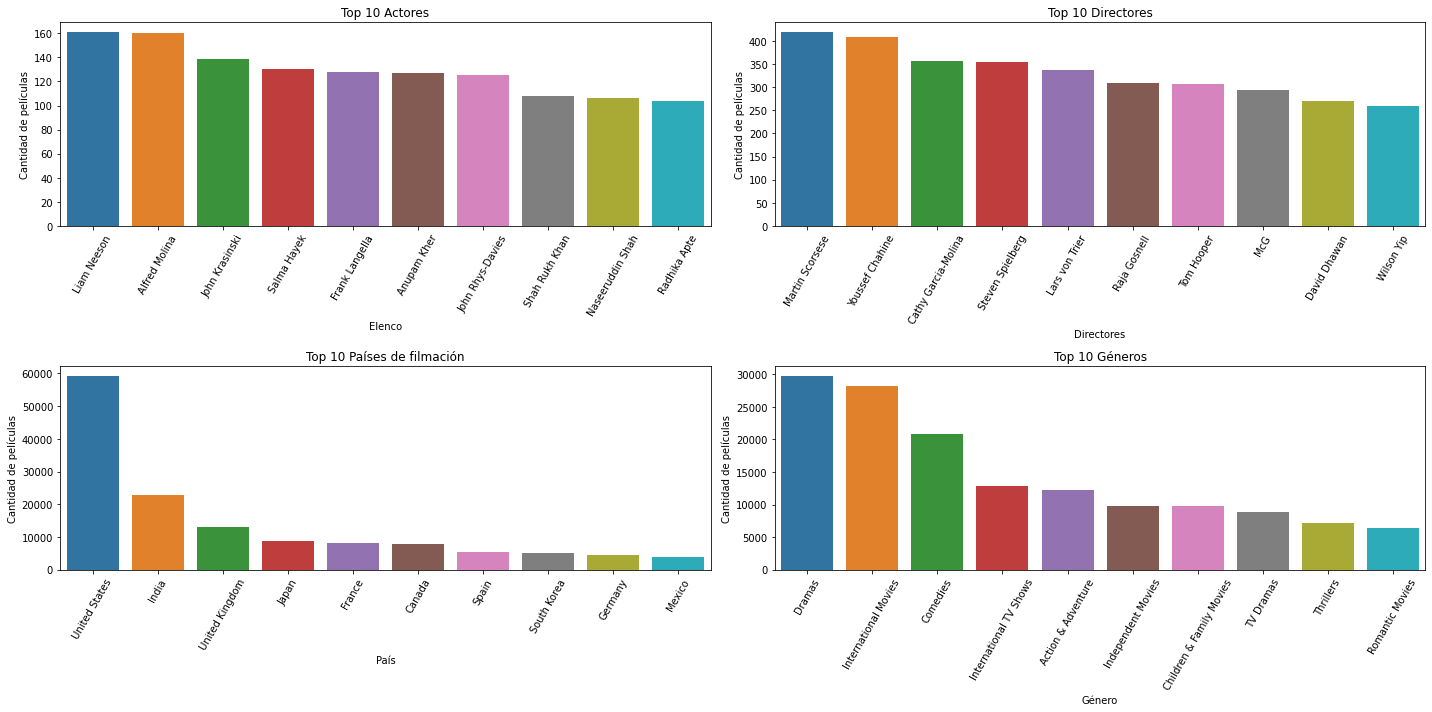

In [ ]:
fig, axs = plt.subplots(figsize=[20, 10],ncols=2, nrows=2)

real_cast=df_final[df_final["cast"]!="Unknown cast"] #quitar los actores desconocidos
cast=real_cast.groupby(['cast']).count().reset_index().sort_values(by=['title'],ascending=False)[:10]
ax1=sns.barplot(x = "cast",y = 'title', data = cast, ax=axs[0,0])
ax1.set_title("Top 10 Actores")
ax1.set_xlabel("Elenco")
ax1.set_ylabel("Cantidad de películas")
ax1.tick_params(axis='x', labelrotation=60)

real_director=df_final[df_final["director"]!="Unknown director"] #quitar los directores desconocidos
director=real_director.groupby(['director']).count().reset_index().sort_values(by=['title'],ascending=False)[:10]
ax2=sns.barplot(x = "director",y = 'title', data = director, ax=axs[0,1])
ax2.set_title("Top 10 Directores")
ax2.set_xlabel("Directores")
ax2.set_ylabel("Cantidad de películas")
ax2.tick_params(axis='x', labelrotation=60)

real_country=df_final[df_final["country"]!="Unknown country"] #quitar los países desconocidos
country=real_country.groupby(['country']).count().reset_index().sort_values(by=['title'],ascending=False)[:10]
ax3=sns.barplot(x = "country",y = 'title', data = country, ax=axs[1,0])
ax3.set_title("Top 10 Países de filmación")
ax3.set_xlabel("País")
ax3.set_ylabel("Cantidad de películas")
ax3.tick_params(axis='x', labelrotation=60)

genre=df_final.groupby(['genre']).count().reset_index().sort_values(by=['title'],ascending=False)[:10]
ax4=sns.barplot(x = "genre",y = 'title', data = genre, ax=axs[1,1])
ax4.set_title("Top 10 Géneros")
ax4.set_xlabel("Género")
ax4.set_ylabel("Cantidad de películas")
ax4.tick_params(axis='x', labelrotation=60)

fig.tight_layout()
plt.show()

De los gráficos se puede deducir que Liam Neeson y Martin Scorsese son, respectivamente, el actor y el director más populares de Netflix. De otro lado, analizando los países y el género más populares de filmación, nos encontramos que Estados Unidos y los Dramas son los que lideran el listado.

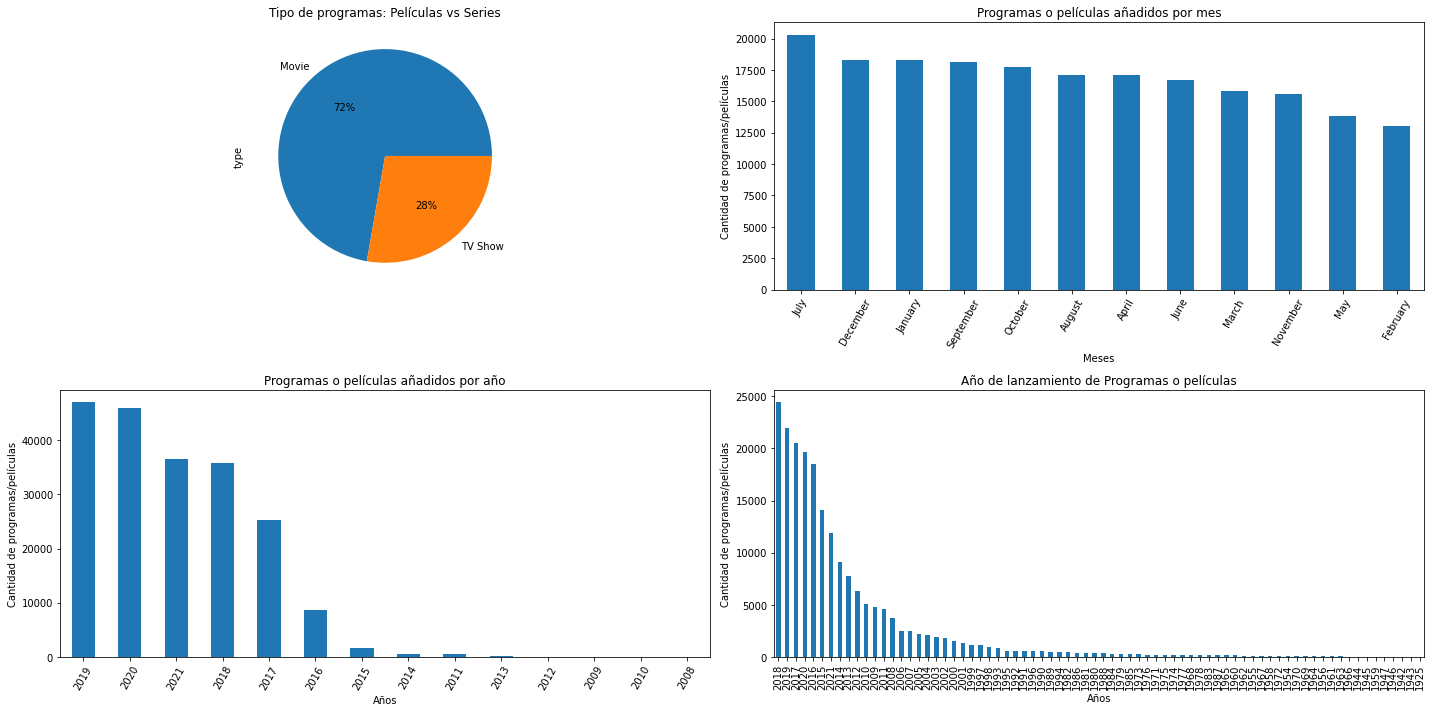

In [ ]:
fig, axs = plt.subplots(figsize=[20, 10],ncols=2, nrows=2)

ax1=df_final["type"].value_counts(normalize).plot(kind="pie",autopct='%1.0f%%',ax=axs[0,0])
ax1.set_title("Tipo de programas: Películas vs Series")

ax2=df_final["month_name_added"].value_counts().plot(kind="bar",ax=axs[0,1])
ax2.set_title("Programas o películas añadidos por mes")
ax2.set_xlabel("Meses")
ax2.set_ylabel("Cantidad de programas/películas")
ax2.tick_params(axis='x', labelrotation=60)

ax3=df_final["year_added"].value_counts().plot(kind="bar",ax=axs[1,0])
ax3.set_title("Programas o películas añadidos por año")
ax3.set_xlabel("Años")
ax3.set_ylabel("Cantidad de programas/películas")
ax3.tick_params(axis='x', labelrotation=60)

ax4=x=df_final["release_year"].value_counts().plot(kind="bar",ax=axs[1,1])
ax4.set_title("Año de lanzamiento de Programas o películas")
ax4.set_xlabel("Años")
ax4.set_ylabel("Cantidad de programas/películas")
ax4.tick_params(axis='x', labelrotation=90)

fig.tight_layout()
plt.show()

De los gráficos anteriores, se puede inferir que más del 70% de los programas lanzados en la plataforma Netflix entre el 2008 y el 2019 fueron películas. Adicionalmente, durante estos años, los meses más populares para lanzamientos fueron los meses de Julio y Diciembre, justamente los meses de vacaciones de verano e invierno. Más aún, es posible evidenciar un aumento de lanzamientos a medida que avanza el tiempo, teniendo picos durante los años 2019 y 2020, coincidentes con pandemia.

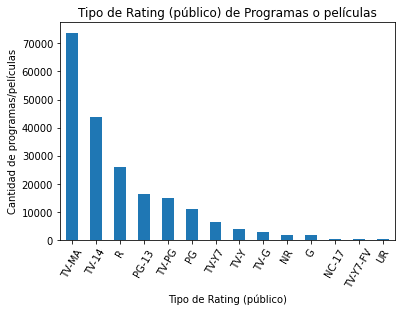

In [ ]:
ax4=df_final["rating"].value_counts().plot(kind="bar")
ax4.set_title("Tipo de Rating (público) de Programas o películas")
ax4.set_xlabel("Tipo de Rating (público)")
ax4.set_ylabel("Cantidad de programas/películas")
ax4.tick_params(axis='x', labelrotation=60)

Finalmente, para analizar la gráfica de rating, vamos primero a ver en qué consiste cada categoría:

In [ ]:
df_final["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

* **PG-13:** Algunos materiales pueden ser inapropiados para niños menores de 13 años.
* **PG:** Se sugiere la supervisión de los padres. Algun material puede no ser adecuado para niños.
* **TV-14:** Mayores de 14 años: Se requiere enfáticamente la compañía de los padres.
* **TV_MA:** Programas de televisión únicamente aptos para la gente de 18 años de edad o más.
* **TV-PG:** Puede ser inadecuado para niños sin la guía de un padre.
* **TV-Y:** Público preinfantil: niños menores de 6 años.
* **TV-Y7:** Público infantil: desde 7 años. Estos programas pueden o no ser apropiados para algunos niños menores de 7 años
* **TV-Y7-FV:** Público infantil con violencia ficticia, de fantasía ó emociones fuertes: desde 7 años.
* **TV-G:** Público general. Aunque esta clasificación no indica un programa diseñado específicamente para los niños, pueden dejar que los niños más jóvenes vean este programa sin supervisión.
* **R:** Restringido. Los menores de 17 años requieren un padre o tutor adulto que lo acompañe.
* **G:** Audiencias Generales. Todas las edades admitidas.  
* **NC-17:** Solo para adultos. Nadie menor de 17 años admitido.
* **NR:** Si una película no se ha enviado para una calificación o es una versión sin cortes de una película que se envió, a menudo se usan las etiquetas No calificada (R) o Sin calificación (UR).
* **UR:** Si una película no se ha enviado para una calificación o es una versión sin cortes de una película que se envió, a menudo se usan las etiquetas No calificada (R) o Sin calificación (UR).

Por tanto, se puede concluir que la categoría de rating más populares en Netflix son la categoría **TV-14**, programas aptos para mayores de 14 años pero que requieren enfáticamente la compañía de los padres y la categoría
**TV_MA** que son programas de televisión únicamente aptos para la gente de 18 años de edad o más.

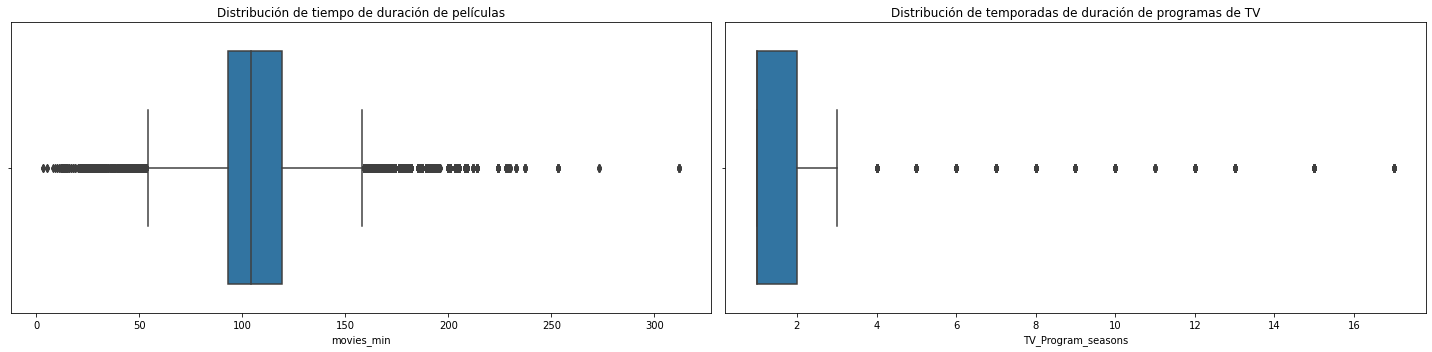

In [ ]:
fig, axs = plt.subplots(figsize=[20, 5],ncols=2, nrows=1)

real_min=df_final[df_final["movies_min"]!=0] #Duración de películas diferente de cero
ax2 = sns.boxplot(x=real_min["movies_min"],ax=axs[0])
ax2.set_title("Distribución de tiempo de duración de películas")

real_seasons=df_final[df_final["TV_Program_seasons"]!=0] #Temporadas de programas de TC diferentes a cero:
ax3 = sns.boxplot(x=real_seasons["TV_Program_seasons"],ax=axs[1])
ax3.set_title("Distribución de temporadas de duración de programas de TV")

fig.tight_layout()
plt.show()

Es pobile observar que las variables numéricas, de acuerdo con su distribución, tienen varios datos atípicos. No obstante, dado la heterogeneidad de los diferentes programas de TV y películas presentes en el Dataframe y sin información adicional, se podría decir que son outliers propios del negocio. En resumen, el tiempo promedio de duración de una película es de **105 minutos** y las temporadas promedio de una serie/programa de TV es de **1.9 temporadas** en la plataforma de Netflix.

# One_Hot_Encoding:

Procederé a hacer un one hot encoding de mi variable categórica **Tipos**, que se refiere al tipo de programa: película o serie que hemos analizado de la plataforma Netflix

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Creamos el objeto
onehotencoder = OneHotEncoder()

#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object

X = onehotencoder.fit_transform(df_final.type.values.reshape(-1,1)).toarray()

X

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# Agregamos al dataframe original
#type_0 es Movie - película
#type_1 es TV Show - serie

dfOneHot = pd.DataFrame(X, columns = ["type_"+str(int(i)) for i in range(X.shape[1])])
df_final_1 = pd.concat([df_final, dfOneHot], axis=1)
df_final_1.head(5)

,title,cast,director,country,genre,type,date_added,release_year,rating,month_name_added,year_added,movies_min,TV_Program_seasons,type_0,type_1
0,Dick Johnson Is Dead,Unknown cast,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,September,2021,90,0,1.0,0.0
1,Blood & Water,Ama Qamata,Unknown director,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,September,2021,0,2,0.0,1.0
2,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Dramas,TV Show,2021-09-24,2021,TV-MA,September,2021,0,2,0.0,1.0
3,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Mysteries,TV Show,2021-09-24,2021,TV-MA,September,2021,0,2,0.0,1.0
4,Blood & Water,Khosi Ngema,Unknown director,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,September,2021,0,2,0.0,1.0


In [ ]:
#droping the country column
df_final_1= df_final_1.drop(['type'], axis=1)

#printing to verify
df_final_1.head()

,title,cast,director,country,genre,date_added,release_year,rating,month_name_added,year_added,movies_min,TV_Program_seasons,type_0,type_1
0,Dick Johnson Is Dead,Unknown cast,Kirsten Johnson,United States,Documentaries,2021-09-25,2020,PG-13,September,2021,90,0,1.0,0.0
1,Blood & Water,Ama Qamata,Unknown director,South Africa,International TV Shows,2021-09-24,2021,TV-MA,September,2021,0,2,0.0,1.0
2,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Dramas,2021-09-24,2021,TV-MA,September,2021,0,2,0.0,1.0
3,Blood & Water,Ama Qamata,Unknown director,South Africa,TV Mysteries,2021-09-24,2021,TV-MA,September,2021,0,2,0.0,1.0
4,Blood & Water,Khosi Ngema,Unknown director,South Africa,International TV Shows,2021-09-24,2021,TV-MA,September,2021,0,2,0.0,1.0


In [ ]:
# Calculamos Variance Inflation Factor(VIF).
# Cuantifica la  multicolinealidad en un análisis de regresión normal de mínimos cuadrados.
# VIF=1, Baja Multicollinearidad
# VIF<5, Moderada Multicollinearidad
# VIF>5, Multicollinearity Extrema (Se busca evitar)



import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Seleccionamos las variables que vamos a analizar
X = df_final_1[['release_year','type_0', 'type_1']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

        feature           VIF
0  release_year      1.059223
1        type_0  38203.935968
2        type_1  14736.758436


*   VIF=1, Baja Multicollinearidad
*   VIF<5, Moderada Multicollinearidad
*   VIF>5, Multicollinearity Extrema (Se busca evitar)

Pero, ¿Qué es la multicolinealidad en pocas palabras? La multicolinealidad ocurre cuando las variables independientes (predictores) en un modelo de regresión están correlacionadas. Las variables independientes deberían ser eso, independientes.





In [ ]:
# Eliminamos una columna y verificamos el impacto
X= X.drop(['type_1'], axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

        feature       VIF
0  release_year  3.592357
1        type_0  3.592357


# Análisis Multivariado:

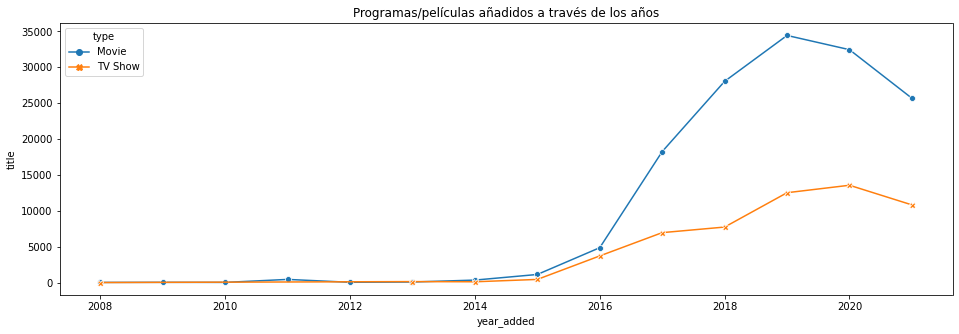

In [ ]:
type_year = (df_final.groupby(['type','year_added'])['title'].size()).reset_index()
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = type_year,x = 'year_added',y = 'title',hue = 'type',style = 'type',markers=True, dashes=False)
plt.title("Programas/películas añadidos a través de los años")
plt.show()

Es posible observar, al cruzar las variables de tipo de programa y años en que fue añadida a la plataforma, que la plataforma viene aumentando considerablemente la cantidad de ambos desde el 2014, encontrando un pico para ambos tipos de programas durante el 2019, aunque con una marcada preferencia por las películas que por las series.

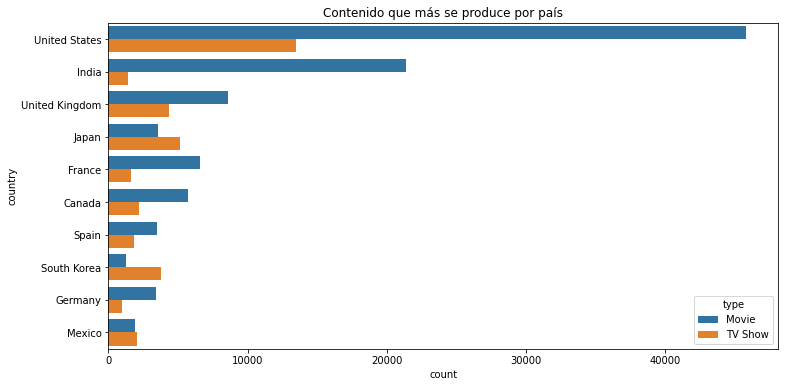

In [ ]:
fig = plt.figure(figsize=(12,6))
df_1=df_final[df_final["country"]!="Unknown country"]
sns.countplot(data = df_1,y = 'country', order = df_1["country"].value_counts().index[:10],hue = 'type')
plt.title("Contenido que más se produce por país")
plt.show()

De otro lado, es evidente que el país que más produce productos de la plataforma es Estados Unidos, seguido de la India. En ambos países, se producen más películas que series. Por el contrario, en países como Japón y Corea del Sur, se producen más series que películas.

# **Conclusiones Generales**:

De acuerdo con el análisis del comportamiento histórico de la plataforma, con respecto a películas y series/programas de TV, se puede concluir que los géneros más producidos son Dramas y películas internacionales, dirigos principalmente a público adulto. El director más popular es Martín Escorcese y el país donde más se producen este tipo de contenido es Estados Unidos, con una diferencia considerable al resto de los países. Es evidente que la plataforma ha venido creciendo, de una manera casi exponencial durante los últimos 2 años, por lo cual, se espera que el tipo de programas que lance a futuro serian principalmente series para Japón y Corea del Sur; y películas para el resto de los países.

# **Enlaces de referencia:**

https://github.com/armandoordonez/eda_couse/blob/main/One_hot_encodign.ipynb

https://github.com/armandoordonez/eda_couse/blob/main/Label_encoding.ipynb

https://github.com/armandoordonez/eda_couse/blob/main/Taller_1_vino.ipynb